<a href="https://colab.research.google.com/github/HalyshAnton/IT-Step-Pyton-AI/blob/main/module2/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Продаж велосипедів

<img src="https://user-images.githubusercontent.com/7065401/58563302-42466a80-8201-11e9-9948-b3e9f88a5662.jpg"
    style="width:400px; float: right; margin: 0 40px 40px 40px;"></img>


## Імпорт модулів

In [254]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Завантаження даних

In [255]:
sales = pd.read_csv(
    'https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module2/data/bike_sales.csv',
    index_col = "Unnamed: 0",
    parse_dates=['Date'])

sales_v2 = pd.read_csv(
    'https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module2/data/bike_sales.csv',
    index_col = "Unnamed: 0")

sales.drop(columns=["Year"], inplace=True)


## Знайомство з даними

In [256]:
# when read_csv has parse_dates=['Date'] the cells of Date is converted
# to <class 'pandas._libs.tslibs.timestamps.Timestamp'>, otherwise  cells would
# have <class 'str'>

print(sales.loc[0]['Date'])
print(sales_v2.loc[0]['Date'])
print(type(sales.loc[0]['Date']))
print(type(sales_v2.loc[0]['Date']))

# data_column = sales['Date']
# print(data_column.dtype)
# print(len(data_column))
# print(type(data_column[0]))

sales.head()

2013-11-26 00:00:00
2013-11-26
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'str'>


,Date,Day,Month,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [257]:
# назви стовпчиків до нижнього регістру
sales.columns = sales.columns.str.lower()
print(sales.head())

        date  day     month  customer_age       age_group customer_gender  \
0 2013-11-26   26  November            19     Youth (<25)               M   
1 2015-11-26   26  November            19     Youth (<25)               M   
2 2014-03-23   23     March            49  Adults (35-64)               M   
3 2016-03-23   23     March            49  Adults (35-64)               M   
4 2014-05-15   15       May            47  Adults (35-64)               F   

     country             state product_category sub_category  \
0     Canada  British Columbia      Accessories   Bike Racks   
1     Canada  British Columbia      Accessories   Bike Racks   
2  Australia   New South Wales      Accessories   Bike Racks   
3  Australia   New South Wales      Accessories   Bike Racks   
4  Australia   New South Wales      Accessories   Bike Racks   

               product  order_quantity  unit_cost  unit_price  profit  cost  \
0  Hitch Rack - 4-Bike               8         45         120     590   3

In [258]:
sales.shape

(113036, 17)

In [259]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113036 entries, 0 to 113035
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   date              113036 non-null  datetime64[ns]
 1   day               113036 non-null  int64         
 2   month             113036 non-null  object        
 3   customer_age      113036 non-null  int64         
 4   age_group         113036 non-null  object        
 5   customer_gender   113036 non-null  object        
 6   country           113036 non-null  object        
 7   state             113036 non-null  object        
 8   product_category  113036 non-null  object        
 9   sub_category      113036 non-null  object        
 10  product           113036 non-null  object        
 11  order_quantity    113036 non-null  int64         
 12  unit_cost         113036 non-null  int64         
 13  unit_price        113036 non-null  int64         
 14  profit   

## Аналіз числових ознак

### Основні статистичні характеристики

Середнє арифметичне(математичне сподівання) `mean`. Можна вважати типовим представником

In [260]:
print(sales['unit_cost'].mean())
print(sales['unit_cost'].min())
print(sales['unit_cost'].max())


267.296365759581
1
2171


Якщо дані мають аномально великі чи малі значення(викиди) то кращим типовим представником буде медіана `median`. Це число яке є більшим рівно за половину даних.

Стійкість характеристики до викидів називають робастністю (robust)

In [261]:
median_cost = sales['unit_cost'].median()
median_cost

9.0

In [262]:
# частка даних менших за медіану
print((sales['unit_cost'] < median_cost).mean())
# the number of datapoints less than median
print((sales['unit_cost'] < median_cost).sum())


0.4776000566191302
53986


Також важливими є квантилі `quantile`: числа які більші рівно за певну частку даних. Найчастіше беруть перший(>25%) та третій(>75%)

In [263]:
q_1 = sales['unit_cost'].quantile(q=0.25)
print(q_1)
q_3 = sales['unit_cost'].quantile(q=0.75)
print(q_3)

2.0
42.0


In [264]:
# частка даних менших за медіану
print((sales['unit_cost'] <= q_1).mean())
print((sales['unit_cost'] <= q_1).sum())

0.317633320358116
35904


Окрім типового представника, важливим є те наскільки дані "сконцентровані" навколо нього. Для цього є дві характеристики: дисперсія `var` та стандартне відхилення `std`

<img src="https://sp-ao.shortpixel.ai/client/to_auto,q_lossless,ret_img,w_1024/https://dataindependent.com/wp-content/uploads/2021/12/Screen-Shot-2020-09-04-at-7.46.16-AM-1024x599-1.png"
style="width:200px; float: right; margin: 0 20px 20px 20px;"></img>

In [265]:
print(sales['unit_cost'].var())

mean_cost = sales['unit_cost'].mean()
sqrd_diff = 0
for i in sales['unit_cost']:
    sqrd_diff += pow(mean_cost-i, 2)

# print(sqrd_diff)
print(sqrd_diff/(len(sales)-1))


302319.05848407175
302319.0584843816


In [266]:
print(sales['unit_cost'].std())
print(np.sqrt(sqrd_diff/(len(sales)-1)))

549.8354831075126
549.8354831077943


In [267]:
print(f"корінь квадратний з дисперсії: {np.sqrt(sales['unit_cost'].var())}")
print(f"стандартне відхилення:         {sales['unit_cost'].std()}")

корінь квадратний з дисперсії: 549.8354831075126
стандартне відхилення:         549.8354831075126


Усі ці характеристики можна отримати за допомогою методу `describe`

In [268]:
print(sales['unit_cost'].describe())

count    113036.000000
mean        267.296366
std         549.835483
min           1.000000
25%           2.000000
50%           9.000000
75%          42.000000
max        2171.000000
Name: unit_cost, dtype: float64


In [269]:
sales.describe()

,date,day,customer_age,order_quantity,unit_cost,unit_price,profit,cost,revenue
count,113036,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,2014-11-23 12:14:55.063519232,15.665753,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
min,2011-01-01 00:00:00,1.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,2013-12-22 00:00:00,8.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,2014-06-27 00:00:00,16.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,2016-01-09 00:00:00,23.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,2016-07-31 00:00:00,31.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000
std,NaN,8.781567,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674


### Основні графіки

Гістограма показує кількість точок що належить конкретному проміжку. Має вигляд стовпчиків.

Text(0.5, 0, 'dollars')

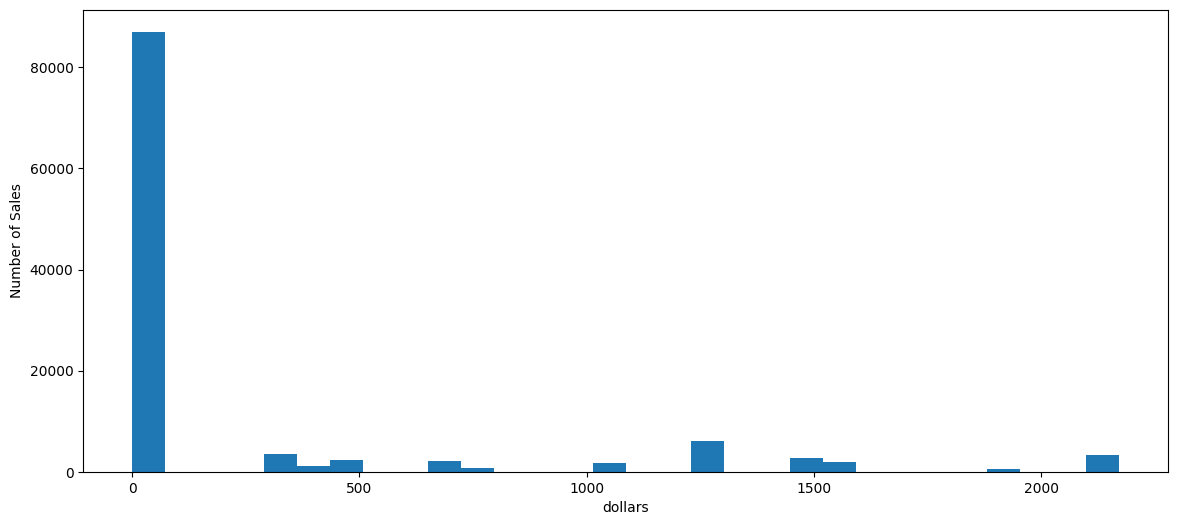

In [270]:
ax = sales['unit_cost'].plot(kind='hist',    # тип діаграми hist
                             bins=30,        # кількість стовпчиків
                             figsize=(14,6)  # розмір зображення(в дюймах)
                             )



ax.set_ylabel('Number of Sales')
ax.set_xlabel('dollars')

Text(0.5, 0, 'Age')

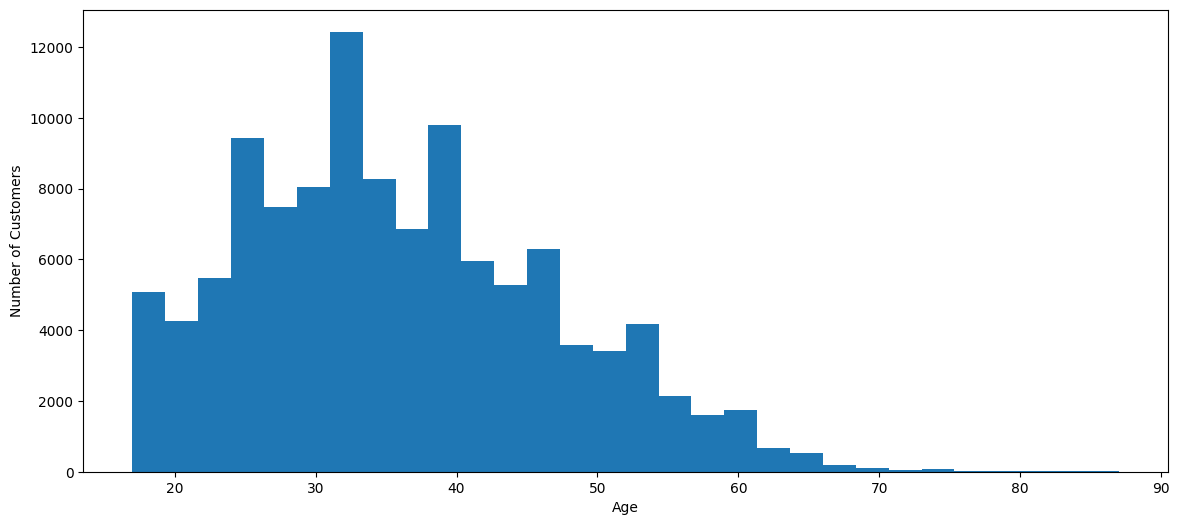

In [271]:
ax = sales['customer_age'].plot(kind='hist',    # тип діаграми hist
                                bins=30,        # кількість стовпчиків
                                figsize=(14,6)  # розмір зображення(в дюймах)
                               )


ax.set_ylabel('Number of Customers')
ax.set_xlabel('Age')

Вищенаведена гістограма є прикладом _поганих_ даних. Більшість алгоритмів ШІ вимагають щоб дані були _нормально розподілені_.

**Центральна гранична теорема:**
Сума деякої кількості незалежних і однаково розподілених випадкових величин із скінченною дисперсією буде прямувати до нормального розподілу із збільшенням кількості цих величин.

Через те, що на більшість числових величин впливає велика кількість _незалежних факторів_, умови теореми доволі часто виконуються.

В даному прикладі ми використовуємо згенеровані дані за допомогою `numpy`

(50000,)


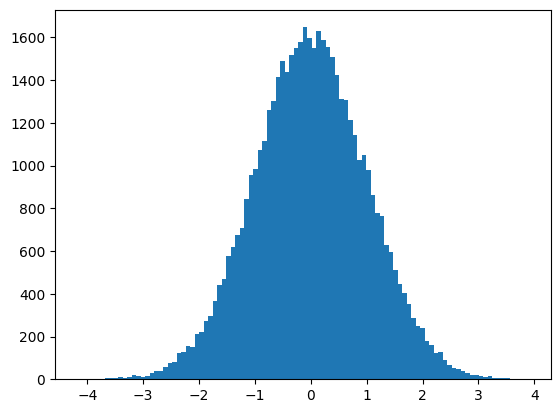

In [272]:
norm_data = np.random.normal(loc=0,      # середнє арифметичне
                             scale=1,   # стандартне відхилення
                             size=50000)
print(norm_data.shape)
plt.hist(norm_data, bins=100)
plt.show()



Ящик з вусами `boxplot` показує взаємне розташування усіх квантилів(включно з медіаною), та дозволяє визначити викиди

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20201127012952/boxplot.png">

35.0
17.0
28.0
35.0
43.0
87.0
left_whisker - 5.5
right_whisker - 65.5
17
87


<Axes: >

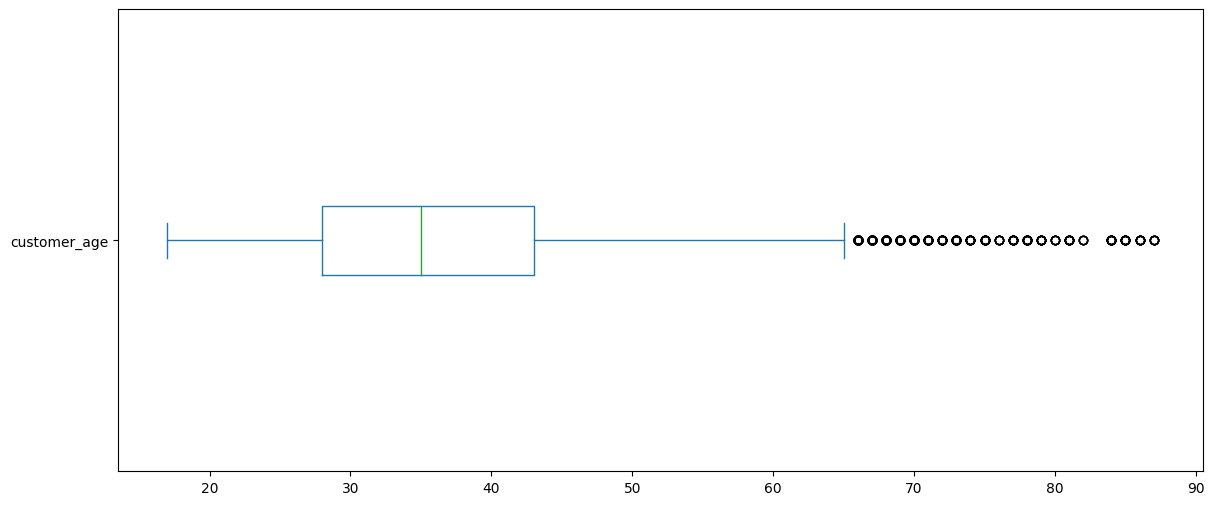

In [273]:
print(sales['customer_age'].median())
print(sales['customer_age'].quantile(q=0))
print(sales['customer_age'].quantile(q=0.25))
print(sales['customer_age'].quantile(q=0.50))
print(sales['customer_age'].quantile(q=0.75))
print(sales['customer_age'].quantile(q=1))
IQR=sales['customer_age'].quantile(q=0.75) - sales['customer_age'].quantile(q=0.25)
print(f"left_whisker - {sales['customer_age'].quantile(q=0.25) - IQR*1.5 }")
print(f"right_whisker - {sales['customer_age'].quantile(q=0.75) + IQR*1.5 }")

print(sales['customer_age'].min())
print(sales['customer_age'].max())
sales['customer_age'].plot(kind='box', vert=False, figsize=(14,6))

<Axes: >

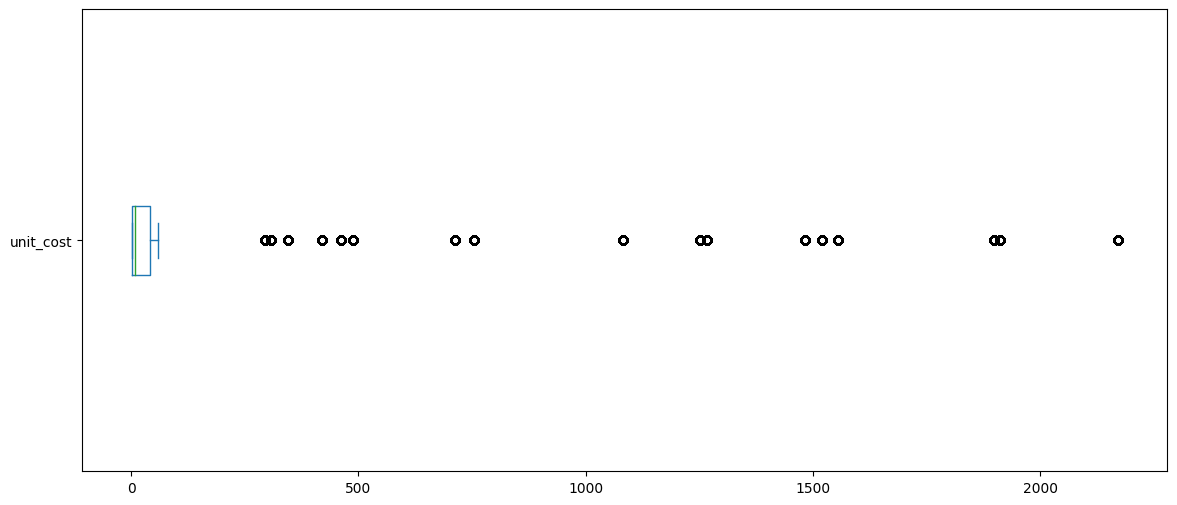

In [274]:
sales['unit_cost'].plot(kind='box', vert=False, figsize=(14,6))

### Очищення від викидів

Існує бізліч алгоритмів для виявлення викидів(деякі з них вимагають умову нормальності даних), проте найбільш універсальним є квантильний аналіз:

1. Обчислюємо нижній `q1` та верхній `q3` квантилі
2. Очислюємо значення `IQR = q3 - q1`
3. Обчислюємо `lower = q1 - 1.5*IQR`
4. Обчислюємо `upper = q3 + 1.5*IQR`
5. Викидами вважаємо значення які `< lower` або `>upper`

Після очищення даних потрібно **обов'язково** перевірити їхню кількість

#### Варіант 1
Знаходими викиди для першого стовпчика, очищуємо і переходимо до наступного

In [275]:
def remove_outliers(df, column_name):
  column = df[column_name]

  q1 = column.quantile(q=0.25)
  q3 = column.quantile(q=0.75)
  # interquartile range
  iqr = q3 - q1

  lower = q1 - 1.5*iqr
  upper = q3 + 1.5*iqr

  mask = (column >= lower) & (column <= upper)

  return df[mask]


# test = remove_outliers(sales, 'unit_cost')
# print(test['unit_cost'].median())
# print(sales['unit_cost'].median())

In [276]:
sales1 = sales.copy()

for column_name in sales1.columns:
  if sales1.dtypes[column_name] in ("object", "datetime64[ns]"):
    continue

  sales1 = remove_outliers(sales1, column_name)

sales1.shape


(67414, 17)

#### Варіант 2
Змінюємо коефіцієнт при `iqr` на 3

In [277]:
def remove_outliers(df, column_name):
  column = df[column_name]

  q1 = column.quantile(q=0.25)
  q3 = column.quantile(q=0.75)

  iqr = q3 - q1

  lower = q1 - 3*iqr # замінити 1,5 на 3
  upper = q3 + 3*iqr

  mask = (column >= lower) & (column <= upper)

  return df[mask]

In [278]:
sales2 = sales.copy()

for column_name in sales2.columns:
  if sales2.dtypes[column_name] in ("object", "datetime64[ns]"):
    continue

  sales2 = remove_outliers(sales1, column_name)


sales2.shape

(67414, 17)

#### Варіант 3
Спочатку знаходими викиди для всіх стовпчиків і лише потім очищуємо дані

In [279]:
sales3 = sales.copy()

In [280]:
# вибираємо стовпчики з числовими ознаками
num_columns = sales3.select_dtypes(include="number").columns
print(num_columns)

sales_num = sales3[num_columns]
print(sales_num.head())
# print(sales.head())

Index(['day', 'customer_age', 'order_quantity', 'unit_cost', 'unit_price',
       'profit', 'cost', 'revenue'],
      dtype='object')
   day  customer_age  order_quantity  unit_cost  unit_price  profit  cost  \
0   26            19               8         45         120     590   360   
1   26            19               8         45         120     590   360   
2   23            49              23         45         120    1366  1035   
3   23            49              20         45         120    1188   900   
4   15            47               4         45         120     238   180   

   revenue  
0      950  
1      950  
2     2401  
3     2088  
4      418  


In [281]:
q1 = sales_num.quantile(q=0.25)
q3 = sales_num.quantile(q=0.75)

iqr = q3 - q1
print(f"IQR for num values of our data: \n{iqr}")

lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr

mask = (sales_num >= lower) & (sales_num <= upper)
print(f"initial result of mask = (sales_num >= lower) & (sales_num <= upper)\n{mask}")
mask = mask.all(axis=1)   # включаємо лише ті рядки, де немає викиду по жодному стовпчику
print(f"results of mask.all(axis=1) - {mask}")

cleaned_sales = sales3[mask]


IQR for num values of our data: 
day                15.0
customer_age       15.0
order_quantity     18.0
unit_cost          40.0
unit_price         65.0
profit            329.0
cost              404.0
revenue           737.0
dtype: float64
initial result of mask = (sales_num >= lower) & (sales_num <= upper)
         day  customer_age  order_quantity  unit_cost  unit_price  profit  \
0       True          True            True       True        True    True   
1       True          True            True       True        True    True   
2       True          True            True       True        True   False   
3       True          True            True       True        True   False   
4       True          True            True       True        True    True   
...      ...           ...             ...        ...         ...     ...   
113031  True          True            True       True        True    True   
113032  True          True            True       True        True    True  

In [282]:
cleaned_sales.shape

(85008, 17)

### Ящик з вусами після очищення

In [283]:
sales = cleaned_sales

<Axes: >

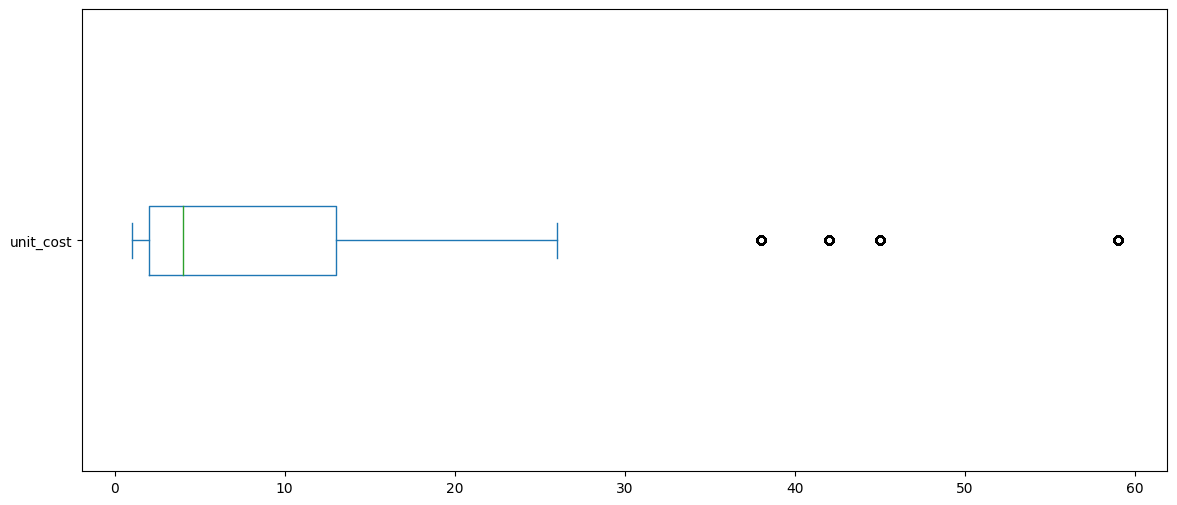

In [284]:
sales['unit_cost'].plot(kind='box', vert=False, figsize=(14,6))

## Аналіз категоріальних ознак

In [285]:
print(sales.head())
print(sales.shape)

        date  day     month  customer_age       age_group customer_gender  \
0 2013-11-26   26  November            19     Youth (<25)               M   
1 2015-11-26   26  November            19     Youth (<25)               M   
4 2014-05-15   15       May            47  Adults (35-64)               F   
5 2016-05-15   15       May            47  Adults (35-64)               F   
6 2014-05-22   22       May            47  Adults (35-64)               F   

     country             state product_category sub_category  \
0     Canada  British Columbia      Accessories   Bike Racks   
1     Canada  British Columbia      Accessories   Bike Racks   
4  Australia   New South Wales      Accessories   Bike Racks   
5  Australia   New South Wales      Accessories   Bike Racks   
6  Australia          Victoria      Accessories   Bike Racks   

               product  order_quantity  unit_cost  unit_price  profit  cost  \
0  Hitch Rack - 4-Bike               8         45         120     590   3

In [286]:
sales['age_group'].value_counts()

age_group
Adults (35-64)          42246
Young Adults (25-34)    28355
Youth (<25)             14233
Seniors (64+)             174
Name: count, dtype: int64

<Axes: ylabel='count'>

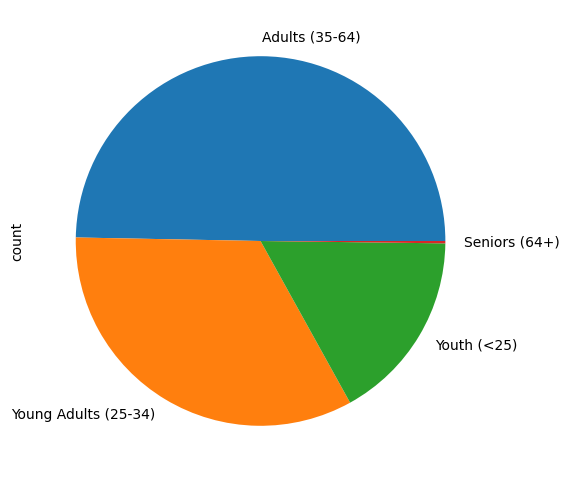

In [287]:
sales['age_group'].value_counts().plot(kind='pie', figsize=(6,6))

Text(0, 0.5, 'Number of Sales')

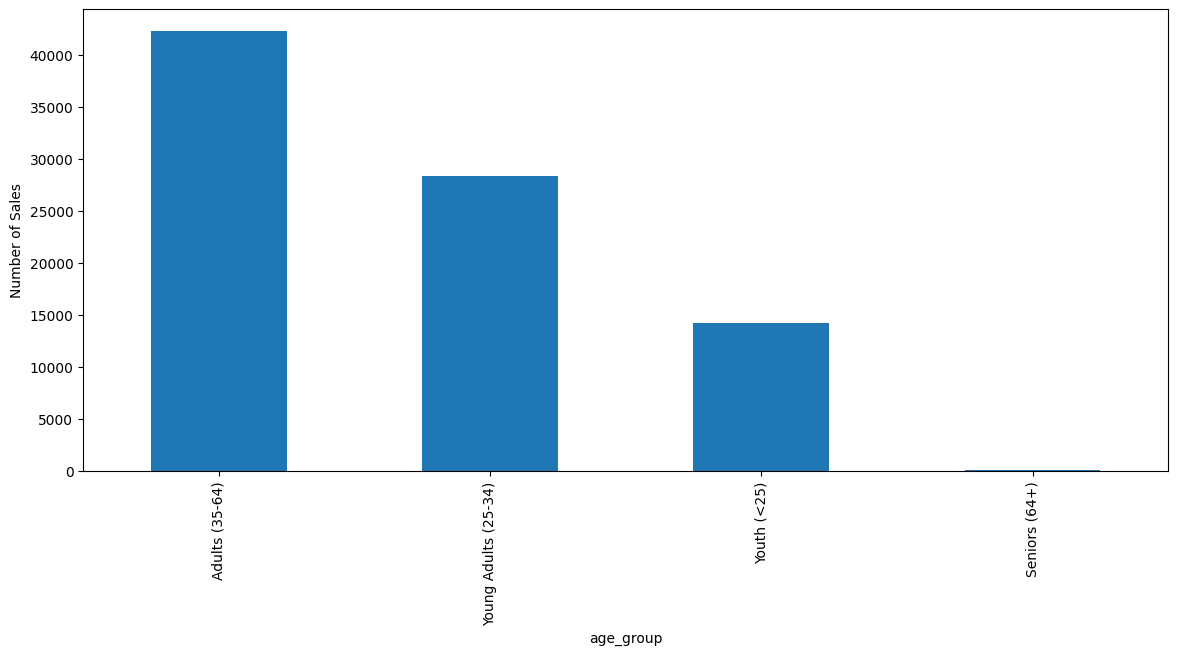

In [288]:
ax = sales['age_group'].value_counts().plot(kind='bar', figsize=(14,6))
ax.set_ylabel('Number of Sales')

In [289]:
print(sales.describe(include="object"))
print(sales.info())


           month       age_group customer_gender        country       state  \
count      85008           85008           85008          85008       85008   
unique        12               4               2              6          52   
top     December  Adults (35-64)               M  United States  California   
freq        8204           42246           44147          30376       17019   

       product_category     sub_category                product  
count             85008            85008                  85008  
unique                2               14                     42  
top         Accessories  Tires and Tubes  Water Bottle - 30 oz.  
freq              69481            33608                  10764  
<class 'pandas.core.frame.DataFrame'>
Index: 85008 entries, 0 to 113035
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              85008 non-null  datetime64[ns]
 1   da



## Залежність між різними ознаками

### Кореляція
Коефіцієнт кореляції Пірсона вимірює лінійну залежність між двома наборами даних. Вимірюється в межех [-1, 1], де 1 - позитивна залежність, -1 - негативна, 0 - відсутність кореляції.

<img src="https://upload.wikimedia.org/wikipedia/commons/3/34/Correlation_coefficient.png">

In [290]:
num_columns = sales3.select_dtypes(include="number").columns
# print(num_columns)

sales_num = sales3[num_columns]

corr = sales_num.corr(method='pearson')

# print(corr)
corr

,day,customer_age,order_quantity,unit_cost,unit_price,profit,cost,revenue
day,1.000000,-0.014296,-0.002412,0.003133,0.003207,0.004623,0.003329,0.003853
customer_age,-0.014296,1.000000,0.026887,-0.021374,-0.020262,0.004319,-0.016013,-0.009326
order_quantity,-0.002412,0.026887,1.000000,-0.515835,-0.515925,-0.238863,-0.340382,-0.312895
unit_cost,0.003133,-0.021374,-0.515835,1.000000,0.997894,0.741020,0.829869,0.817865
unit_price,0.003207,-0.020262,-0.515925,0.997894,1.000000,0.749870,0.826301,0.818522
profit,0.004623,0.004319,-0.238863,0.741020,0.749870,1.000000,0.902233,0.956572
cost,0.003329,-0.016013,-0.340382,0.829869,0.826301,0.902233,1.000000,0.988758
revenue,0.003853,-0.009326,-0.312895,0.817865,0.818522,0.956572,0.988758,1.000000


**Візуалізація**

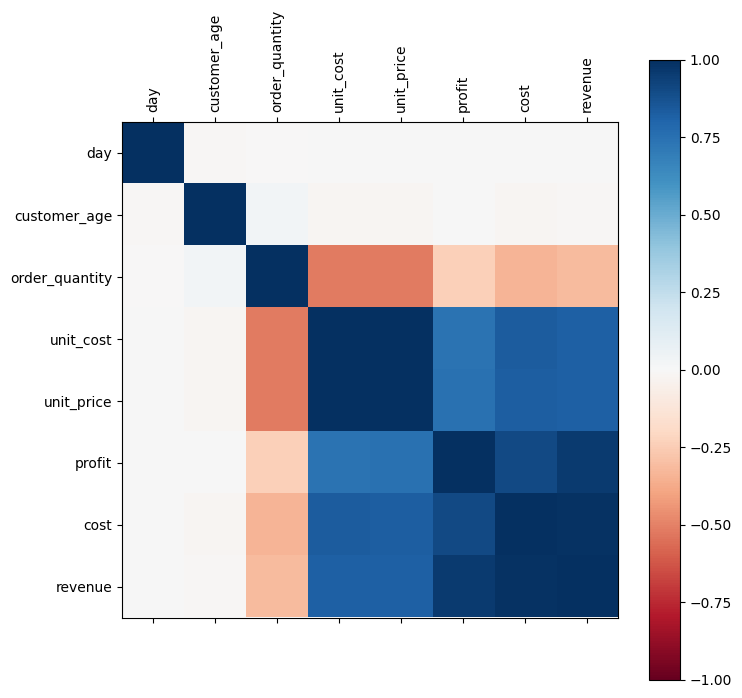

In [291]:
# fig = plt.figure(figsize=(8,8))
# plt.matshow(corr, cmap='RdBu', fignum=fig.number)
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)

# підписи для рядків та стовпчиків матриці
# plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
# plt.yticks(range(len(corr.columns)), corr.columns)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), labels=corr.columns)

# кольорова панель
plt.colorbar()
plt.clim(-1, 1)

Для виявлення будь-якої зростаючої або спадаючої залежності є коефіцієнт кореляції Спірмена

In [292]:
df = pd.DataFrame({'x': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                   'y': [1, 2, 23, 24, 105, 106, 507, 508, 10_009]})

print(f"pearson:  {df.corr(method='pearson').loc['x', 'y']}")
print()
print(f"spearman: {df.corr(method='spearman').loc['x', 'y']}")

pearson:  0.5910908084714311

spearman: 1.0


<class 'pandas.core.frame.DataFrame'>
Index: 85008 entries, 0 to 113035
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              85008 non-null  datetime64[ns]
 1   day               85008 non-null  int64         
 2   month             85008 non-null  object        
 3   customer_age      85008 non-null  int64         
 4   age_group         85008 non-null  object        
 5   customer_gender   85008 non-null  object        
 6   country           85008 non-null  object        
 7   state             85008 non-null  object        
 8   product_category  85008 non-null  object        
 9   sub_category      85008 non-null  object        
 10  product           85008 non-null  object        
 11  order_quantity    85008 non-null  int64         
 12  unit_cost         85008 non-null  int64         
 13  unit_price        85008 non-null  int64         
 14  profit            85008 no

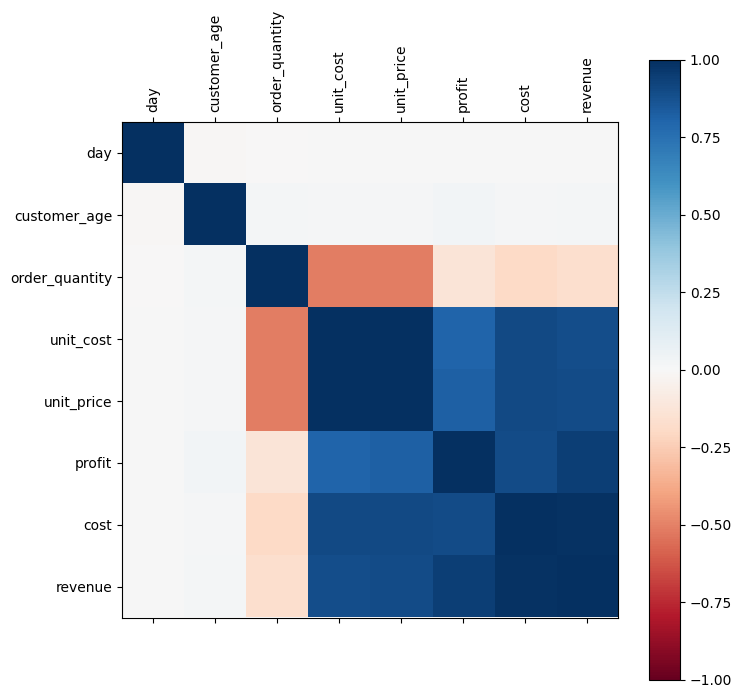

In [293]:
sales.info()

corr = sales_num.corr(method='spearman')

fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)

plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.clim(-1, 1)

### Точкові діаграми
Зображення двох характеристик як координат точок

<Axes: xlabel='customer_age', ylabel='revenue'>

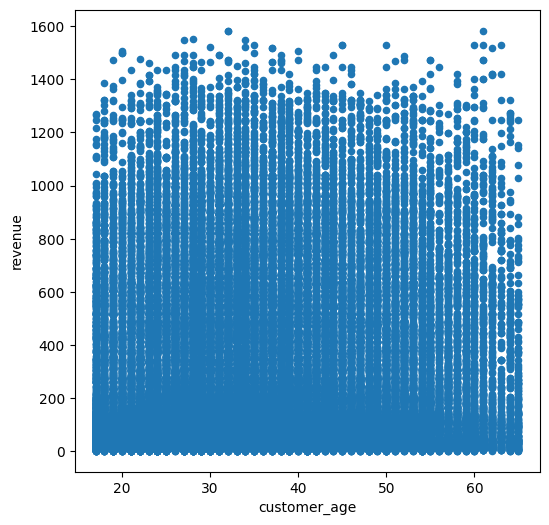

In [294]:
sales.plot(kind='scatter', x='customer_age', y='revenue', figsize=(6,6))

<Axes: xlabel='revenue', ylabel='profit'>

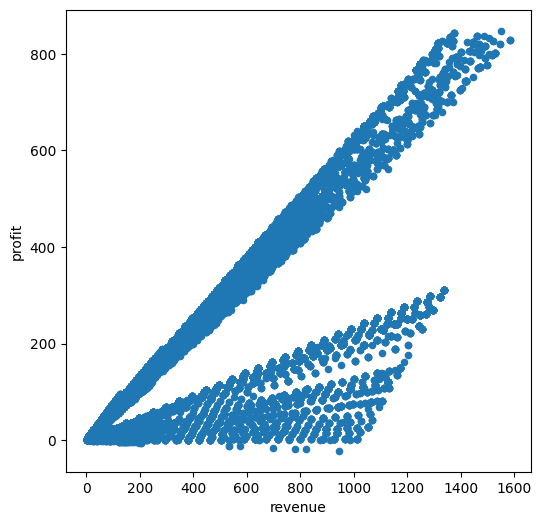

In [295]:
sales.plot(kind='scatter', x='revenue', y='profit', figsize=(6,6))

<Axes: xlabel='unit_cost', ylabel='profit'>

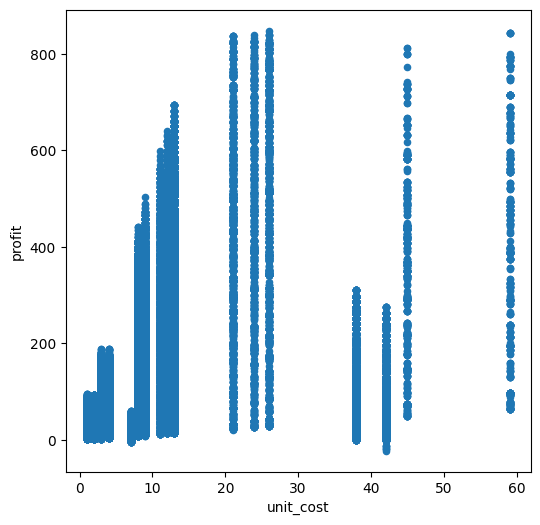

In [296]:
sales.plot(kind='scatter', x='unit_cost', y='profit', figsize=(6,6))

<Axes: xlabel='customer_age', ylabel='date'>

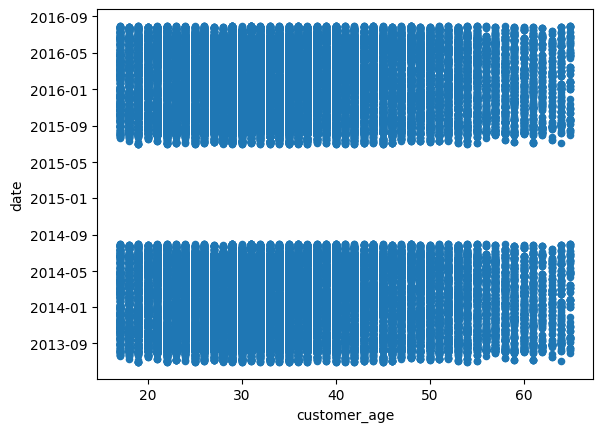

In [297]:
sales.plot(kind='scatter', x='customer_age', y='date')

### Групові ящики з вусами
Зображають декілька ящиків з вусами одної(числової) характеристики, згрупованих за значенням іншої(категоріальної) характеристики

In [298]:
sales

,date,day,month,customer_age,age_group,customer_gender,country,state,product_category,sub_category,product,order_quantity,unit_cost,unit_price,profit,cost,revenue
0,2013-11-26,26,November,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
4,2014-05-15,15,May,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
5,2016-05-15,15,May,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,5,45,120,297,225,522
6,2014-05-22,22,May,47,Adults (35-64),F,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,199,180,379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,April,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,2014-04-02,2,April,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,2016-04-02,2,April,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,2014-03-04,4,March,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260


(array([1, 2, 3, 4]),
 [Text(1, 0, 'Adults (35-64)'),
  Text(2, 0, 'Seniors (64+)'),
  Text(3, 0, 'Young Adults (25-34)'),
  Text(4, 0, 'Youth (<25)')])

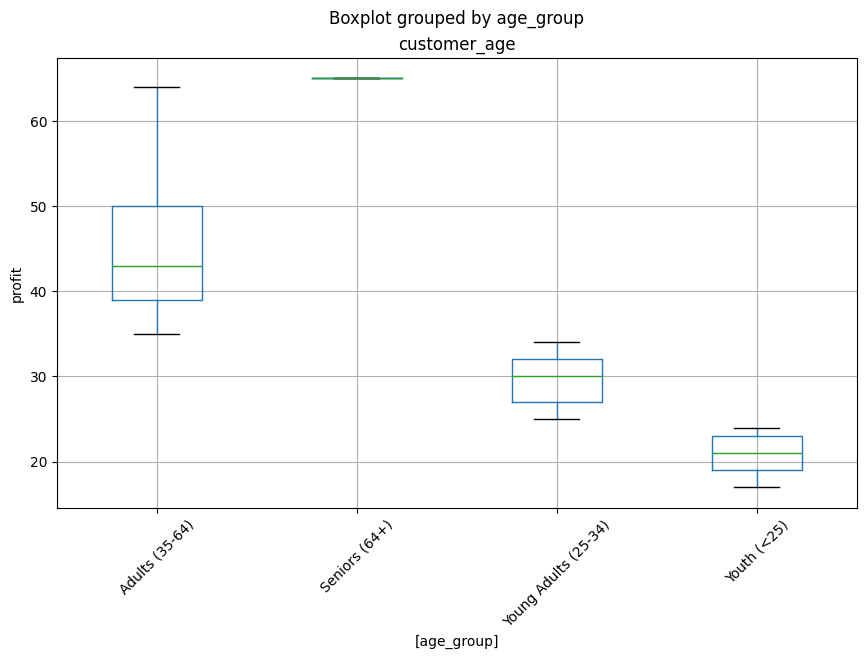

In [299]:
ax = sales[['customer_age', 'age_group']].boxplot(by='age_group', figsize=(10,6))
ax.set_ylabel('profit')
plt.xticks(rotation=45)
